# Importing Libraries and Loading the Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load dataset
cc_apps = pd.read_csv('crxdata.csv', header=None)

# Assign column names (adjust based on actual dataset details)
cc_apps.columns = ["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "A11", "A12", "A13", "A14", "A15", "A16"]

# Basic EDA

In [3]:
#display the first five rows using the head function
cc_apps.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [4]:
#show the column names
cc_apps.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16'],
      dtype='object')

In [5]:
#shape of the data
cc_apps.shape

(690, 16)

In [6]:
# check for missing values
cc_apps.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [7]:
#check data types
cc_apps.dtypes

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16     object
dtype: object

In [8]:
# create a copy of the dataset for visualization purpose
ccapps_df = cc_apps.copy()
ccapps_df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16'],
      dtype='object')

In [9]:
# show the distribution of our target the data
ccapps_df['A16'].value_counts(normalize = True)

-    0.555072
+    0.444928
Name: A16, dtype: float64

In [10]:
## We can see that 44.49% were approved and 55.5% were not approved.

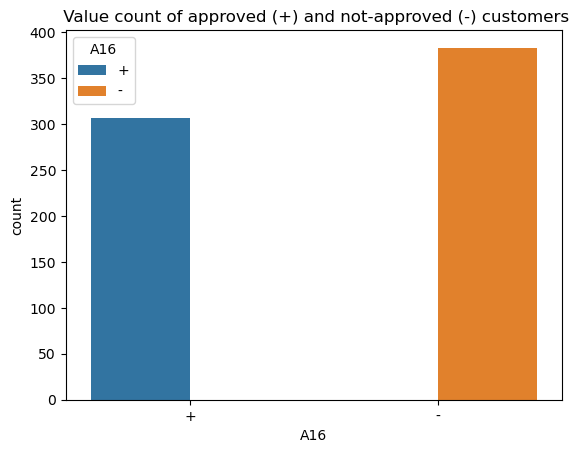

In [11]:
# import seaborn as sns
import seaborn as sns
sns.countplot(data=ccapps_df, x='A16', hue='A16').set(title = " Value count of approved (+) and not-approved (-) customers");

# Preprocessing and Scaling the data

In [12]:
# Replace '?' with NaN
ccapps_df.replace('?', np.nan, inplace=True)

In [13]:
# Handle missing values (example: fill categorical with mode, numerical with mean)
for col in ccapps_df.columns:
    if ccapps_df[col].dtype == 'object':
        ccapps_df[col].fillna(ccapps_df[col].mode()[0], inplace=True)
    else:
        ccapps_df[col].fillna(ccapps_df[col].mean(), inplace=True)

In [14]:
# Encode the target variable ('+' and '-' to 1 and 0)
label_encoder = LabelEncoder()
ccapps_df['A16'] = label_encoder.fit_transform(ccapps_df['A16'])  #

In [15]:
# Encode categorical variables
ccapps_df = pd.get_dummies(ccapps_df, drop_first=True)

In [16]:
ccapps_df

,A3,A8,A11,A15,A16,A1_b,A2_15.17,A2_15.75,A2_15.83,A2_15.92,...,A14_00640,A14_00680,A14_00711,A14_00720,A14_00760,A14_00840,A14_00928,A14_00980,A14_01160,A14_02000
0,0.000,1.25,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.460,3.04,6,560,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.500,1.50,0,824,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.540,3.75,5,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5.625,1.71,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,10.085,1.25,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
686,0.750,2.00,2,394,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
687,13.500,2.00,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
688,0.205,0.04,0,750,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Split features and target
X = ccapps_df.drop("A16", axis=1)  # Replace with appropriate target column if needed
y = ccapps_df["A16"]  # Replace with appropriate target column

In [18]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the data on the 4 models

In [20]:
# Initialize models
log_model = LogisticRegression(solver='lbfgs', max_iter=1000)
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
lgb_model = LGBMClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

## Using grid search to fine tune hyperparameters for the Models



In [21]:
# Define parameter grids for hyperparameter tuning
log_param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 200]
}

xgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

lgb_param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [5, 10, -1],
    'num_leaves': [31, 50, 100],
    'subsample': [0.8, 1.0]
}

rf_param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


In [22]:
# GridSearchCV for each model
log_grid_search = GridSearchCV(estimator=log_model, param_grid=log_param_grid, 
                               cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
log_grid_search.fit(X_train, y_train)

xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, 
                               cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
xgb_grid_search.fit(X_train, y_train)

lgb_grid_search = GridSearchCV(estimator=lgb_model, param_grid=lgb_param_grid, 
                               cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
lgb_grid_search.fit(X_train, y_train)

rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, 
                              cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
[LightGBM] [Info] Number of positive: 273, number of negative: 210
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 328
[LightGBM] [Info] Number of data points in the train set: 483, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.565217 -> initscore=0.262364
[LightGBM] [Info] Start training from score 0.262364
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy', verbose=1)

In [23]:
# Get best parameters for each model
log_best_params = log_grid_search.best_params_
xgb_best_params = xgb_grid_search.best_params_
lgb_best_params = lgb_grid_search.best_params_
rf_best_params = rf_grid_search.best_params_

In [24]:
# Re-train models with best parameters
log_model_best = LogisticRegression(**log_best_params)
xgb_model_best = XGBClassifier(**xgb_best_params, eval_metric='logloss', random_state=42)
lgb_model_best = LGBMClassifier(**lgb_best_params, random_state=42)
rf_model_best = RandomForestClassifier(**rf_best_params, random_state=42)
log_model_best.fit(X_train, y_train)
xgb_model_best.fit(X_train, y_train)
lgb_model_best.fit(X_train, y_train)
rf_model_best.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 273, number of negative: 210
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000273 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 328
[LightGBM] [Info] Number of data points in the train set: 483, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.565217 -> initscore=0.262364
[LightGBM] [Info] Start training from score 0.262364
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_split=5,
                       random_state=42)

In [25]:
# Make predictions with the fine-tuned models
y_pred_log_best = log_model_best.predict(X_test)
y_pred_xgb_best = xgb_model_best.predict(X_test)
y_pred_lgb_best = lgb_model_best.predict(X_test)
y_pred_rf_best = rf_model_best.predict(X_test)

In [26]:
# Function to collect metrics
def collect_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    return accuracy, precision, recall, f1, roc_auc

In [27]:
# Collect metrics for the fine-tuned models
log_metrics_best = collect_metrics(y_test, y_pred_log_best)
xgb_metrics_best = collect_metrics(y_test, y_pred_xgb_best)
lgb_metrics_best = collect_metrics(y_test, y_pred_lgb_best)
rf_metrics_best = collect_metrics(y_test, y_pred_rf_best)

# Evaluating Metrics

In [28]:
# Print metrics for fine-tuned models
metrics_best = [log_metrics_best, xgb_metrics_best, lgb_metrics_best, rf_metrics_best]

print(f"{'Model':<20} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'ROC-AUC':<10}")
print("-" * 60)
for model, metric in zip(['Logistic Regression', 'XGBoost', 'LightGBM', 'Random Forest'], metrics_best):
    print(f"{model:<20} {metric[0]:<10.4f} {metric[1]:<10.4f} {metric[2]:<10.4f} {metric[3]:<10.4f} {metric[4]:<10.4f}")

Model                Accuracy   Precision  Recall     F1-Score   ROC-AUC   
------------------------------------------------------------
Logistic Regression  0.7681     0.7672     0.8091     0.7876     0.7654    
XGBoost              0.8551     0.8704     0.8545     0.8624     0.8551    
LightGBM             0.8551     0.8636     0.8636     0.8636     0.8545    
Random Forest        0.8647     0.8475     0.9091     0.8772     0.8618    
